#  CIFAR CNN

<font color="red">Train your best CNN model on the CIFAR dataset. Perform Champion vs Challenger bake off !
</font>

<img src="https://karpathy.github.io/assets/cifar_preview.png"/>

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical
import numpy as np

### Load Dataset

In [2]:
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print (x_train.shape, y_train.shape)

x_train  /= 255
x_test /= 255

print (x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)
(50000, 32, 32, 3) (50000, 10)


### Sample Dataset

CIFAR Data Size : (10000, 32, 32, 3)


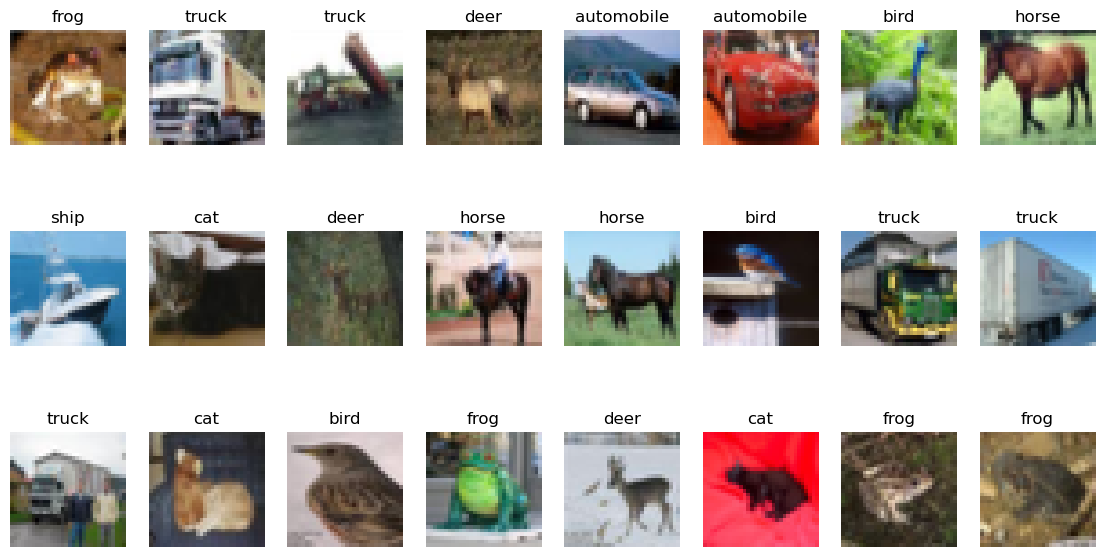

In [3]:
print ("CIFAR Data Size :" , x_test.shape)
plt.rcParams['figure.figsize'] = (8,8)

# Display the first few  training images
images_and_labels = list(zip(x_train, y_train))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels[:24]):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    index = np.where(label == 1)
    plt.title(class_names[index[0][0]])
plt.show()

### Data Augmentation Layers

*Data augmentation is inactive at test time so input images will only be augmented during calls to Model.fit (not Model.evaluate or Model.predict).*

https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
IMG_SIZE = 32

#resize and resale 
resize_and_rescale = Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

#data augmentation
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

### Define Models

In [ ]:
def base_model_1():
    model = Sequential()

   
    return model

In [ ]:
def base_model_2():
    model = Sequential()

    return model

In [ ]:
model = base_model_1()
model.summary()

In [ ]:
# Train model
model.compile()

### Train Model

In [ ]:
# Fit model
epochs = 80
batch_size=32

In [ ]:
# fits the model on batches with real-time data augmentation:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

### Persist Model

In [ ]:
#save model to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 

### Test Model

In [ ]:
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

In [ ]:
history.history.keys()

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize Accuracy Vs Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy vs Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
# Display the first few images
images_and_labels = list(zip(x_test, y_test))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels[:24]):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    index = np.where(label == 1)
    imagedata = image[np.newaxis, :, :]
    pred = model.predict(imagedata)
    pred= pred[0].argmax(axis=0)
    plt.title(class_names[pred] +  " / " + class_names[index[0][0]])
plt.show()